In [19]:
# Dependencies
import pandas as pd
import numpy as np
import os
from pandas import DataFrame
import matplotlib.pyplot as plt

In [2]:
# Import CSV file
maternal_data_df = pd.read_csv("/Users/angelapacatte/Documents/Homework/Maternal_health_risk/resources/Maternal_Health_Risk_Data_Set.csv")

In [3]:
maternal_data_df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [4]:
maternal_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          1014 non-null   int64  
 1   SystolicBP   1014 non-null   int64  
 2   DiastolicBP  1014 non-null   int64  
 3   BS           1014 non-null   float64
 4   BodyTemp     1014 non-null   float64
 5   HeartRate    1014 non-null   int64  
 6   RiskLevel    1014 non-null   object 
dtypes: float64(2), int64(4), object(1)
memory usage: 55.6+ KB


In [5]:
maternal_data_df.columns

Index(['Age', 'SystolicBP', 'DiastolicBP', 'BS', 'BodyTemp', 'HeartRate',
       'RiskLevel'],
      dtype='object')

In [6]:
len(maternal_data_df)

1014

In [7]:
maternal_data_df.shape

(1014, 7)

In [8]:
# Null value search
maternal_data_df.isnull().sum()

Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64

In [9]:
# Description Statistics of Main DF
maternal_data_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000,1014.000000
mean,29.871795,113.198225,76.460552,8.725986,98.665089,74.301775
std,13.474386,18.403913,13.885796,3.293532,1.371384,8.088702
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,19.000000,100.000000,65.000000,6.900000,98.000000,70.000000
50%,26.000000,120.000000,80.000000,7.500000,98.000000,76.000000
75%,39.000000,120.000000,90.000000,8.000000,98.000000,80.000000
max,70.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [15]:
high_risk_df = maternal_data_df.loc[maternal_data_df['RiskLevel'] == 'high risk']
high_risk_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.00,98.0,86,high risk
1,35,140,90,13.00,98.0,70,high risk
2,29,90,70,8.00,100.0,80,high risk
3,30,140,85,7.00,98.0,70,high risk
5,23,140,80,7.01,98.0,70,high risk
...,...,...,...,...,...,...,...
1008,48,120,80,11.00,98.0,88,high risk
1009,22,120,60,15.00,98.0,80,high risk
1010,55,120,90,18.00,98.0,60,high risk
1011,35,85,60,19.00,98.0,86,high risk


In [16]:
low_risk_df = maternal_data_df.loc[maternal_data_df['RiskLevel'] == 'low risk']
low_risk_df

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
4,35,120,60,6.10,98.0,76,low risk
10,23,90,60,7.01,98.0,76,low risk
12,25,110,89,7.01,98.0,77,low risk
15,15,120,80,7.01,98.0,70,low risk
19,10,70,50,6.90,98.0,70,low risk
...,...,...,...,...,...,...,...
949,59,120,80,7.50,98.0,70,low risk
950,23,120,80,7.50,98.0,70,low risk
951,17,85,60,7.50,102.0,86,low risk
952,32,120,90,7.50,98.0,70,low risk


In [17]:
high_risk_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,272.000000,272.000000,272.000000,272.000000,272.000000,272.000000
mean,36.216912,124.194853,85.073529,12.122610,98.899265,76.742647
std,13.032206,20.227185,14.112428,4.173525,1.558692,8.697878
min,12.000000,83.000000,60.000000,6.100000,98.000000,60.000000
25%,25.000000,120.000000,75.000000,7.900000,98.000000,70.000000
50%,35.000000,130.000000,90.000000,11.000000,98.000000,77.000000
75%,48.000000,140.000000,100.000000,15.000000,100.000000,86.000000
max,65.000000,160.000000,100.000000,19.000000,103.000000,90.000000


In [18]:
low_risk_df.describe()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
count,406.000000,406.000000,406.000000,406.000000,406.000000,406.000000
mean,26.869458,105.866995,72.534483,7.220271,98.368966,72.770936
std,13.121661,15.894002,13.054210,0.645596,1.108941,8.293341
min,10.000000,70.000000,49.000000,6.000000,98.000000,7.000000
25%,17.000000,90.000000,60.000000,6.900000,98.000000,70.000000
50%,22.000000,120.000000,75.000000,7.500000,98.000000,70.000000
75%,32.000000,120.000000,80.000000,7.500000,98.000000,77.000000
max,70.000000,129.000000,100.000000,11.000000,103.000000,88.000000


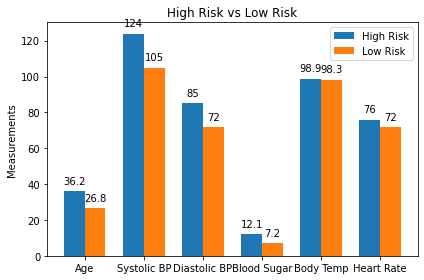

In [22]:
labels = ['Age', 'Systolic BP', 'Diastolic BP', 'Blood Sugar', 'Body Temp', 'Heart Rate']
high_risk_means = [36.2, 124, 85, 12.1, 98.9, 76]
low_risk_means = [26.8, 105, 72, 7.2, 98.3, 72]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, high_risk_means, width, label='High Risk')
rects2 = ax.bar(x + width/2, low_risk_means, width, label='Low Risk')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Measurements')
ax.set_title('High Risk vs Low Risk')
ax.set_xticks(x, labels)
ax.legend()

ax.bar_label(rects1, padding=5)
ax.bar_label(rects2, padding=5)

fig.tight_layout()

plt.show()